In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
test_data = '/content/drive/MyDrive/Taiwo/msc_testing_dataset.csv'
train_data = '/content/drive/MyDrive/Taiwo/msc_training_dataset.csv'

In [3]:
df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

In [4]:
df_train.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,3,1,2,1,1,0,1,0,0,1,1,6835
1,5,2,2,2,1,0,0,0,0,1,1,9005
2,5,2,2,2,1,0,0,0,0,1,1,9005
3,1,2,1,2,0,0,0,0,1,1,0,5105
4,2,1,2,3,1,1,0,0,1,1,0,9105


In [5]:
df_test.head()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
0,1,1,1,3,0,0,1,1,0,1,0,5068
1,5,1,1,2,0,0,0,0,0,1,1,7658
2,5,1,1,3,0,0,0,1,1,1,1,11318
3,4,2,2,1,0,1,1,0,0,1,0,8858
4,5,2,1,1,0,1,1,1,0,0,1,11178


In [6]:
df_train.shape

(3000, 12)

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          3000 non-null   int64
 1   bathroom      3000 non-null   int64
 2   kitchen       3000 non-null   int64
 3   french_door   3000 non-null   int64
 4   backyard      3000 non-null   int64
 5   furnished     3000 non-null   int64
 6   green_paint   3000 non-null   int64
 7   solar_power   3000 non-null   int64
 8   woodfloor     3000 non-null   int64
 9   qlm_security  3000 non-null   int64
 10  club_access   3000 non-null   int64
 11  price         3000 non-null   int64
dtypes: int64(12)
memory usage: 281.4 KB


In [8]:
df_test.shape

(999, 12)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   room          999 non-null    int64
 1   bathroom      999 non-null    int64
 2   kitchen       999 non-null    int64
 3   french_door   999 non-null    int64
 4   backyard      999 non-null    int64
 5   furnished     999 non-null    int64
 6   green_paint   999 non-null    int64
 7   solar_power   999 non-null    int64
 8   woodfloor     999 non-null    int64
 9   qlm_security  999 non-null    int64
 10  club_access   999 non-null    int64
 11  price         999 non-null    int64
dtypes: int64(12)
memory usage: 93.8 KB


In [10]:
df_train.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,2.990000,1.489000,1.522000,1.998333,0.490333,0.488667,0.485000,0.495667,0.512333,0.480667,0.499667,8606.600000
std,1.424281,0.499962,0.499599,0.813153,0.499990,0.499955,0.499858,0.500065,0.499931,0.499709,0.500083,2216.248563
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2235.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7005.000000
50%,3.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8615.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10215.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15035.000000


In [11]:
df_test.describe()

,room,bathroom,kitchen,french_door,backyard,furnished,green_paint,solar_power,woodfloor,qlm_security,club_access,price
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000
mean,3.019019,1.491491,1.496496,1.959960,0.510511,0.474474,0.523524,0.49049,0.501502,0.500501,0.495495,8601.863864
std,1.413731,0.500178,0.500238,0.809759,0.500140,0.499598,0.499696,0.50016,0.500248,0.500250,0.500230,2217.898743
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2688.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7068.000000
50%,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,0.000000,8608.000000
75%,4.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,10128.000000
max,5.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,14318.000000


In [12]:
x_train = df_train.drop('price', axis=1)
x_test = df_test.drop('price', axis=1)
y_train = df_train['price']
y_test = df_test['price']

In [13]:
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [14]:
from sklearn.model_selection import GridSearchCV

# create a dictionary of parameter grids for each model
lr_params = {'fit_intercept': [True, False]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
dt_params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6]}
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

The above performs a grid search over a range of hyperparameters for all our models. And use the GridSearchCV function from scikit-learn to perform the grid search to find the best hyperparameters that maximize the performance of the model on the training set.


In [15]:
# create a list of tuples, where each tuple contains a model and its corresponding parameter grid
models = [
    ('Linear Regression', lr, lr_params),
    ('Random Forest', rf, rf_params),
    ('Decision Tree', dt, dt_params),
    ('KNNeighbor',knn, knn_params)
]

In [16]:
# Define a dictionary to store the best estimator for each model after hyperparameter tuning
best_estimators = []
# loop through each model and its parameter grid, performing a grid search
for name, model, params in models:
    grid = GridSearchCV(model, params, cv=5, n_jobs=-1)
    grid.fit(x_train, y_train)
    print(f"Best parameters for {type(model).__name__}: {grid.best_params_}")
    print(f"Best score for: {type(model).__name__}: {grid.best_score_:.2f}")
    best_estimators.append(grid.best_estimator_)

Best parameters for LinearRegression: {'fit_intercept': True}
Best score for: LinearRegression: 1.00
Best parameters for RandomForestRegressor: {'max_depth': 7, 'n_estimators': 200}
Best score for: RandomForestRegressor: 0.96
Best parameters for DecisionTreeRegressor: {'max_depth': 7, 'min_samples_split': 2}
Best score for: DecisionTreeRegressor: 0.94
Best parameters for KNeighborsRegressor: {'n_neighbors': 7, 'weights': 'distance'}
Best score for: KNeighborsRegressor: 0.93


all the algorithms seems to have a perfect accuracy score

In [17]:
# Generate predicted labels for test data using best estimator found for each model
y_pred_lr = best_estimators[0].predict(x_test)
y_pred_rf = best_estimators[1].predict(x_test)
y_pred_dt = best_estimators[2].predict(x_test)
y_pred_knn = best_estimators[3].predict(x_test)

In [18]:
# evaluate each model's performance using mean absolute error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"Linear Regression MAE: {mae_lr:.2f}")
print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Decision Tree MAE: {mae_dt:.2f}")
print(f"KNN MAE: {mae_knn:.2f}")

Linear Regression MAE: 13.00
Random Forest MAE: 355.11
Decision Tree MAE: 394.81
KNN MAE: 339.02


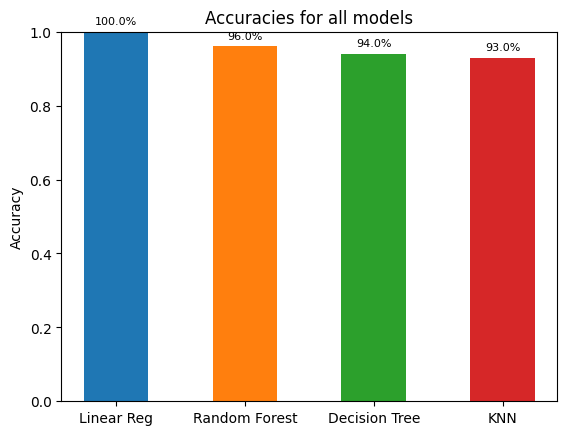

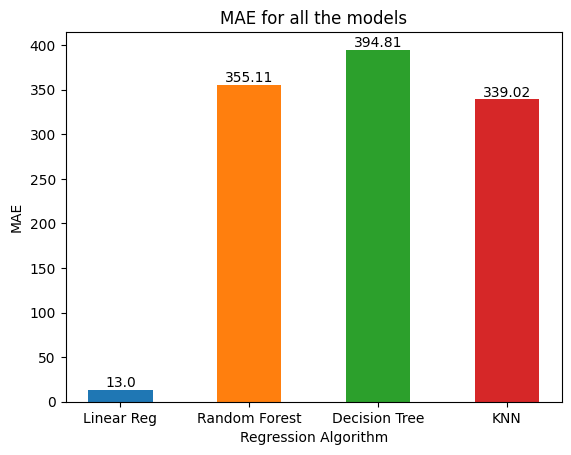

In [19]:
#Visualize the comparism for all the models
errors = [mae_lr, mae_rf, mae_dt, mae_knn]
accuracies = [1.00, 0.96, 0.94, 0.93]
labels = ["Linear Reg", "Random Forest", "Decision Tree", "KNN", ]

#plot the accuracy for all the models
plt.bar(labels, accuracies, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.ylim([0, 1])
plt.title('Accuracies for all models')
plt.ylabel('Accuracy')

# Add percentages to the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.02, f'{acc*100:.1f}%', ha='center', fontsize=8)

plt.show()

#plot the MAE for all the models
plt.bar(labels, errors, width=0.5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Add figures to the bars
for i, val in enumerate(errors):
    plt.text(i, val, round(val, 2), horizontalalignment='center', verticalalignment='bottom')

plt.title("MAE for all the models")
plt.ylabel("MAE")
plt.xlabel("Regression Algorithm")
plt.show()



In [20]:
# make predictions on the data with Linear Regression as it's the best model of all the algorithms
predictions = best_estimators[0].predict(x_test)

In [21]:
# add the predictions to the data as a new column
df_test["predicted_price"] = predictions

# print the first 10 rows of the data with the predicted prices
print(df_test.head(10))

   room  bathroom  kitchen  french_door  backyard  furnished  green_paint  \
0     1         1        1            3         0          0            1   
1     5         1        1            2         0          0            0   
2     5         1        1            3         0          0            0   
3     4         2        2            1         0          1            1   
4     5         2        1            1         0          1            1   
5     5         1        1            2         1          1            1   
6     5         1        2            3         0          0            1   
7     2         1        2            1         0          1            1   
8     2         1        1            3         1          1            1   
9     1         1        1            3         1          0            0   

   solar_power  woodfloor  qlm_security  club_access  price  predicted_price  
0            1          0             1            0   5068           505

In [22]:
# check the importance of each features to our prediction using RF
feature_importance = pd.DataFrame({'Feature': x_test.columns,
                                       'Importance': best_estimators[1].feature_importances_})

# sort the dataframe by importance values in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

         Feature  Importance
0           room    0.446595
5      furnished    0.206281
8      woodfloor    0.184653
7    solar_power    0.118987
10   club_access    0.023564
4       backyard    0.007664
2        kitchen    0.004930
9   qlm_security    0.003171
3    french_door    0.001900
6    green_paint    0.001559
1       bathroom    0.000697


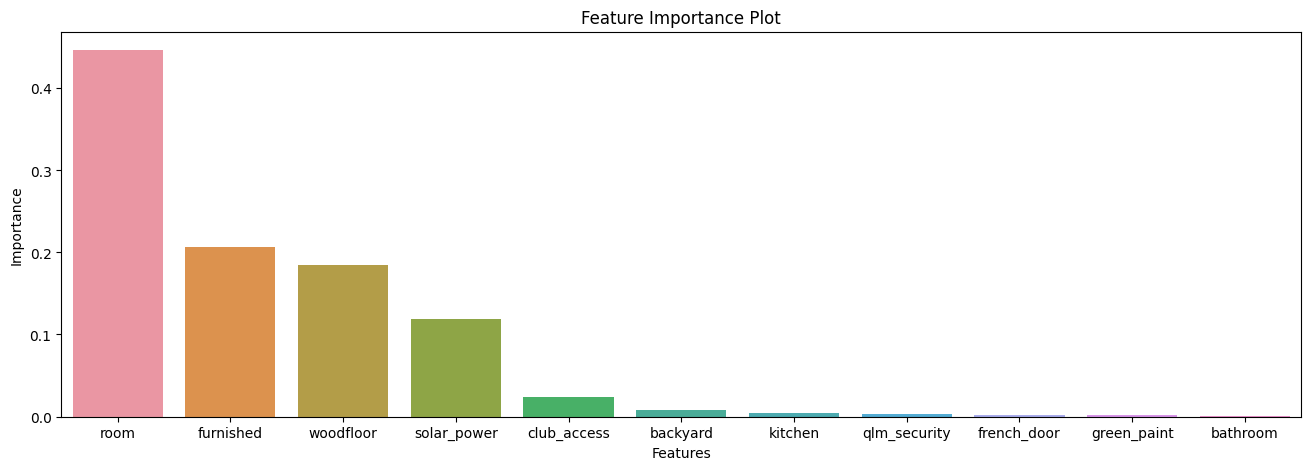

In [23]:
#Plot the feature Importance
feature_importances = best_estimators[1].feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_test.columns[i] for i in indices]

plt.figure(figsize=(16, 5))
sns.barplot(x=names, y=feature_importances[indices])
plt.title("Feature Importance Plot")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()